In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train_data.csv',index_col="調査日",parse_dates=True)
df1 = pd.read_csv('data/train_data_1mon.csv',index_col="調査日",parse_dates=True)
df2 = pd.read_csv('data/train_data_2mon.csv',index_col="調査日",parse_dates=True)
df3 = pd.read_csv('data/train_data_3mon.csv',index_col="調査日",parse_dates=True)
df = df.resample("W-MON").last()
df1 = df1.resample("W-MON").last()
df2 = df2.resample("W-MON").last()
df3 = df3.resample("W-MON").last()

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [5]:
import statsmodels.api as sm 

そのままのデータで学習

In [6]:
df

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-01-02,231,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-01-09,210,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-01-16,197,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-01-23,199,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-01-30,202,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,170,5.100000,0.000000,6.228571,5.071429,0.000000,7.828571,-6.057143,0.285714,5.585714
2022-02-14,193,5.842857,3.714286,4.285714,6.114286,12.285714,3.228571,-4.528571,3.357143,5.457143
2022-02-21,192,5.042857,2.357143,6.528571,6.328571,7.571429,5.571429,-5.585714,2.357143,2.042857


In [7]:
train = df[:-24]
test = df[-24:]

In [8]:
len(test)

24

In [9]:
test

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2021-09-27,220,23.414286,3.071429,5.642857,23.485714,0.000000,8.057143,14.514286,3.500000,5.228571
2021-10-04,209,23.928571,1.642857,7.771429,22.700000,22.214286,6.885714,13.985714,1.142857,4.571429
2021-10-11,187,24.114286,0.000000,5.957143,23.028571,2.500000,6.400000,15.200000,0.428571,5.585714
2021-10-18,162,21.057143,3.214286,4.857143,19.428571,5.642857,3.557143,10.957143,3.642857,4.228571
2021-10-25,145,15.514286,5.428571,4.257143,15.757143,8.214286,5.928571,4.657143,1.785714,4.200000
2021-11-01,158,16.800000,0.928571,7.571429,16.700000,10.214286,3.857143,6.085714,1.571429,6.285714
2021-11-08,168,16.842857,0.142857,6.657143,17.814286,2.071429,6.814286,6.085714,0.000000,6.428571
2021-11-15,155,14.400000,6.571429,6.842857,16.585714,3.428571,7.442857,5.414286,2.714286,6.428571
2021-11-22,141,13.971429,7.214286,4.957143,15.385714,4.714286,4.000000,4.085714,3.571429,6.171429


In [10]:
len(train)

247

In [11]:
y = train["キャベツ"]
X = train[train.columns[train.columns != "キャベツ"]]

In [12]:
y

調査日
2017-01-02    231
2017-01-09    210
2017-01-16    197
2017-01-23    199
2017-01-30    202
             ... 
2021-08-23    155
2021-08-30    161
2021-09-06    159
2021-09-13    188
2021-09-20    204
Freq: W-MON, Name: キャベツ, Length: 247, dtype: int64

In [13]:
X

,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,
2017-01-02,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-01-09,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-01-16,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-01-23,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-01-30,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...
2021-08-23,25.528571,32.071429,3.100000,26.371429,0.500000,7.542857,19.571429,4.642857,2.885714
2021-08-30,29.100000,0.000000,10.114286,27.371429,0.000000,8.757143,21.514286,1.071429,6.071429
2021-09-06,25.657143,16.357143,3.771429,22.842857,24.071429,0.942857,15.285714,13.928571,1.114286


コード参考:https://www.lifull.blog/entry/2019/12/25/151030

In [14]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(sp, sd, sq))]

In [15]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(y, order = param, seasonal_order = param_seasonal,freq="W-MON")
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30025D+00    |proj g|=  2.23458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.208D-06   4.300D+00
  F =   4.3002460353506118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 

 This problem is unconstrained.


ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1831.0514541319264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=  3.73557D+00    |proj g|=  4.83255D-01

At iterate    5    f=  3.54446D+00    |proj g|=  2.30034D-03

At iterate   10    f=  3.54389D+00    |proj g|=  6.39240D-04

At iterate   15    f=  3.54362D+00    |proj g|=  1.61203D-04

At iterate   20    f=  3.54358D+00    |proj g|=  3.24527D-05

At iterate   25    f=  3.54358D+00    |proj g|=  4.51341D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     28      1     0     0   4.513D-06   3.544D+00
  F =   3.5435790863644239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Sub

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   3.589D-06   4.300D+00
  F =   4.3002460284900925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2128.321538074106
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  4.55476D+00    |proj g|=  7.00737D-01

At iterate    5    f=  4.30171D+00    |proj g|=  4.59296D-03

At iterate   10    f=  4.30014D+00    |proj g|=  2.35208D-04

At iterate   15    f=  4.30000D+00    |proj g|=  1.94708D-04

At iterate   20    f=  4.29997D+00    |proj g|=  5.30820D-05

At iterate   25    f=  4.29996D+00    |proj g|=  4.22459D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   7.091D-06   4.300D+00
  F =   4.2999536027537539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.60227D+00    |proj g|=  9.65823D-02

At iterate    5    f=  3.58990D+00    |proj g|=  2.73566D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   2.006D-06   3.585D+00
  F =   3.5849484733054489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1774.9645458128916
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.64561D+00    |proj g|=  8.00801D-02

At iterate    5    f=  3.55243D+00    |proj g|=  3.29761D-02

At iterate   10    f=  3.54184D+00    |proj g|=  1.17954D-03

At iterate   15    f=  3.54090D+00    |proj g|=  1.76609D-03

At iterate   20    f=  3.54081D+00    |proj g|=  3.85059D-03

At iterate   25    f=  3.54075D+00    |proj g|=  9.94323D-05

At iterate   30    f=  3.54074D+00    |proj g|=  1.28611D-04

At iterate   35    f=  3.54074D+00    |proj g|=  5.70273D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     41      1     0     0   5.703D-06   3.541D+00
  F =   3.54073727043

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.11277D+00    |proj g|=  2.76097D-03

At iterate   10    f=  4.11245D+00    |proj g|=  2.00378D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.152D-06   4.112D+00
  F =   4.1124545679310067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 1, 52) - AIC: 2037.5525565579173
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f=  3.55018D+00    |proj g|=  3.32051D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   4.571D-06   3.550D+00
  F =   3.5501575852634208     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1757.77784712013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    0    f=  3.57945D+00    |proj g|=  3.35040D-01

At iterate    5    f=  3.44190D+00    |proj g|=  2.34082D-02

At iterate   10    f=  3.40309D+00    |proj g|=  1.28046D-02

At iterate   15    f=  3.39907D+00    |proj g|=  1.44840D-02

At iterate   20    f=  3.39859D+00    |proj g|=  7.76893D-04

At iterate   25    f=  3.39851D+00    |proj g|=  1.03789D-04

At iterate   30    f=  3.39850D+00    |proj g|=  4.32772D-05

At iterate   35    f=  3.39850D+00    |proj g|=  1.48459D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     40      1     0     0   5.599D-06   3.399D+00
  F =   3.39850279809

 This problem is unconstrained.



At iterate    5    f=  4.11265D+00    |proj g|=  4.87122D-03

At iterate   10    f=  4.11245D+00    |proj g|=  5.88951D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   5.890D-07   4.112D+00
  F =   4.1124545693488752     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2037.5525572583442
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f=  4.11260D+00    |proj g|=  1.73425D-03

At iterate   10    f=  4.11243D+00    |proj g|=  7.40808D-04

At iterate   15    f=  4.11213D+00    |proj g|=  8.03823D-03

At iterate   20    f=  4.11203D+00    |proj g|=  9.35868D-04

At iterate   25    f=  4.11195D+00    |proj g|=  2.99253D-04

At iterate   30    f=  4.11193D+00    |proj g|=  6.77522D-05

At iterate   35    f=  4.11192D+00    |proj g|=  1.10445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     48      1     0     0   8.633D-05   4.112D+00
  F =   4.1119215093225145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.49064D+00    |proj g|=  1.32785D-01

At iterate    5    f=  3.44571D+00    |proj g|=  3.65186D-02

At iterate   10    f=  3.44406D+00    |proj g|=  4.22702D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   4.227D-06   3.444D+00
  F =   3.4440634986139815     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1707.3

 This problem is unconstrained.



At iterate    0    f=  3.54834D+00    |proj g|=  1.31846D-01

At iterate    5    f=  3.44219D+00    |proj g|=  2.29419D-02

At iterate   10    f=  3.42633D+00    |proj g|=  2.78031D-02

At iterate   15    f=  3.39892D+00    |proj g|=  1.18233D-02

At iterate   20    f=  3.39691D+00    |proj g|=  1.75468D-03

At iterate   25    f=  3.39672D+00    |proj g|=  1.04631D-03

At iterate   30    f=  3.39669D+00    |proj g|=  2.06417D-04

At iterate   35    f=  3.39669D+00    |proj g|=  2.26742D-05

At iterate   40    f=  3.39669D+00    |proj g|=  4.67623D-05

At iterate   45    f=  3.39669D+00    |proj g|=  1.18177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  4.19541D+00    |proj g|=  2.81663D-01

At iterate    5    f=  4.07430D+00    |proj g|=  3.22681D-03

At iterate   10    f=  4.07386D+00    |proj g|=  3.98144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.309D-06   4.074D+00
  F =   4.0738599254140304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 2), 季節変動パラメータ(0, 0, 1, 52) - AIC: 2020.4

 This problem is unconstrained.



At iterate    5    f=  3.51973D+00    |proj g|=  6.70086D-03

At iterate   10    f=  3.51937D+00    |proj g|=  1.18757D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   4.483D-07   3.519D+00
  F =   3.5193744731919692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 2), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1744.5709897568327
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.52053D+00    |proj g|=  3.31636D-01

At iterate    5    f=  3.41295D+00    |proj g|=  2.09396D-02

At iterate   10    f=  3.37536D+00    |proj g|=  6.35282D-03

At iterate   15    f=  3.37316D+00    |proj g|=  3.22119D-03

At iterate   20    f=  3.37274D+00    |proj g|=  5.45791D-04

At iterate   25    f=  3.37271D+00    |proj g|=  8.44174D-04

At iterate   30    f=  3.37270D+00    |proj g|=  2.04463D-04

At iterate   35    f=  3.37270D+00    |proj g|=  7.18817D-05

At iterate   40    f=  3.37269D+00    |proj g|=  3.90146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     46   

 This problem is unconstrained.



At iterate    5    f=  4.07412D+00    |proj g|=  7.46171D-03

At iterate   10    f=  4.07386D+00    |proj g|=  3.09349D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   6.485D-06   4.074D+00
  F =   4.0738616130187690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 2), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2020.487636831272
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.


At iterate    0    f=  4.19115D+00    |proj g|=  4.46472D-01

At iterate    5    f=  4.07425D+00    |proj g|=  4.90883D-03

At iterate   10    f=  4.07391D+00    |proj g|=  2.41193D-04

At iterate   15    f=  4.07391D+00    |proj g|=  1.41977D-03

At iterate   20    f=  4.07386D+00    |proj g|=  4.14734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   4.705D-06   4.074D+00
  F =   4.0738516877750062     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search       

 This problem is unconstrained.



At iterate    0    f=  3.43270D+00    |proj g|=  2.63927D-02

At iterate    5    f=  3.42710D+00    |proj g|=  3.56991D-02

At iterate   10    f=  3.41568D+00    |proj g|=  8.29924D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   4.737D-06   3.416D+00
  F =   3.4156817107103610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 2), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1695.3

 This problem is unconstrained.



At iterate    0    f=  3.49030D+00    |proj g|=  9.93950D-02

At iterate    5    f=  3.41686D+00    |proj g|=  4.78770D-02

At iterate   10    f=  3.39803D+00    |proj g|=  1.24519D-02

At iterate   15    f=  3.37106D+00    |proj g|=  2.10848D-03

At iterate   20    f=  3.37104D+00    |proj g|=  2.48668D-03

At iterate   25    f=  3.37088D+00    |proj g|=  1.78048D-03

At iterate   30    f=  3.37084D+00    |proj g|=  4.30996D-04

At iterate   35    f=  3.37083D+00    |proj g|=  3.30413D-04

At iterate   40    f=  3.37083D+00    |proj g|=  8.52046D-05

At iterate   45    f=  3.37083D+00    |proj g|=  5.29607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.10087D+00    |proj g|=  7.05243D-04

At iterate   10    f=  4.10086D+00    |proj g|=  1.52430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     13      1     0     0   3.959D-07   4.101D+00
  F =   4.1008640668430631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 0, 1, 52) - AIC: 2031.8268490204732
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f=  3.55944D+00    |proj g|=  2.17172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   2.692D-06   3.559D+00
  F =   3.5594192060293195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1762.3530877784838
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           

 This problem is unconstrained.



At iterate    0    f=  3.55951D+00    |proj g|=  3.48464D-01

At iterate    5    f=  3.43307D+00    |proj g|=  2.94758D-02

At iterate   10    f=  3.39721D+00    |proj g|=  4.13232D-03

At iterate   15    f=  3.39543D+00    |proj g|=  3.14301D-04

At iterate   20    f=  3.39528D+00    |proj g|=  6.22676D-04

At iterate   25    f=  3.39527D+00    |proj g|=  2.66124D-05

At iterate   30    f=  3.39527D+00    |proj g|=  4.11671D-05

At iterate   35    f=  3.39526D+00    |proj g|=  4.26987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     39      1     0     0   9.804D-06   3.395D+00
  F =   3.39526479817

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   3.134D-05   4.101D+00
  F =   4.1008598039853350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2031.8247431687555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  4.23889D+00    |proj g|=  5.10991D-01

At iterate    5    f=  4.10092D+00    |proj g|=  2.41989D-04

At iterate   10    f=  4.10087D+00    |proj g|=  2.64873D-03

At iterate   15    f=  4.10086D+00    |proj g|=  6.64608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   4.685D-05   4.101D+00
  F =   4.1008570181649375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.46356D+00    |proj g|=  1.23597D-02

At iterate    5    f=  3.43998D+00    |proj g|=  5.17333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   4.386D-06   3.436D+00
  F =   3.4363937448855228     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1703.5785099734483
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.51626D+00    |proj g|=  9.55549D-02

At iterate    5    f=  3.44379D+00    |proj g|=  1.34754D-02

At iterate   10    f=  3.39776D+00    |proj g|=  2.25393D-02

At iterate   15    f=  3.39168D+00    |proj g|=  2.04415D-03

At iterate   20    f=  3.39094D+00    |proj g|=  1.63075D-03

At iterate   25    f=  3.39084D+00    |proj g|=  1.21892D-03

At iterate   30    f=  3.39082D+00    |proj g|=  5.24282D-04

At iterate   35    f=  3.39081D+00    |proj g|=  1.99175D-04

At iterate   40    f=  3.39081D+00    |proj g|=  2.36234D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     46   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.07957D+00    |proj g|=  2.50060D-03

At iterate   10    f=  4.07946D+00    |proj g|=  4.96594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.324D-05   4.079D+00
  F =   4.0794334097810490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 1), 季節変動パラメータ(0, 0, 1, 52) - AIC: 2023.240104431838
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    5    f=  3.53020D+00    |proj g|=  4.39831D-03

At iterate   10    f=  3.53011D+00    |proj g|=  3.95310D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.953D-06   3.530D+00
  F =   3.5301069706623514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 1), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1749.8728435072017
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.53073D+00    |proj g|=  3.29814D-01

At iterate    5    f=  3.42059D+00    |proj g|=  3.11507D-02

At iterate   10    f=  3.37930D+00    |proj g|=  1.13530D-02

At iterate   15    f=  3.37743D+00    |proj g|=  9.22681D-04

At iterate   20    f=  3.37699D+00    |proj g|=  8.15831D-04

At iterate   25    f=  3.37694D+00    |proj g|=  9.20311D-04

At iterate   30    f=  3.37693D+00    |proj g|=  7.98978D-05

At iterate   35    f=  3.37693D+00    |proj g|=  1.97789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     43      1     0     0   1.786D-05   3.377D+00
  F =   3.37693257448

 This problem is unconstrained.



At iterate    5    f=  4.07953D+00    |proj g|=  1.36328D-03

At iterate   10    f=  4.07944D+00    |proj g|=  2.19522D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   9.604D-07   4.079D+00
  F =   4.0794353666474965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 1), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2023.241071123863
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    5    f=  4.07961D+00    |proj g|=  1.35250D-03

At iterate   10    f=  4.07950D+00    |proj g|=  2.66699D-04

At iterate   15    f=  4.07949D+00    |proj g|=  2.64934D-03

At iterate   20    f=  4.07943D+00    |proj g|=  6.33502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   4.496D-05   4.079D+00
  F =   4.0794289167930726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.44319D+00    |proj g|=  4.12263D-02

At iterate    5    f=  3.43627D+00    |proj g|=  1.52721D-02

At iterate   10    f=  3.42098D+00    |proj g|=  2.25850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   5.395D-06   3.421D+00
  F =   3.4209773689601226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 1), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1697.9

 This problem is unconstrained.



At iterate    0    f=  3.50034D+00    |proj g|=  9.81830D-02

At iterate    5    f=  3.42019D+00    |proj g|=  1.69049D-02

At iterate   10    f=  3.38873D+00    |proj g|=  7.84982D-02

At iterate   15    f=  3.37501D+00    |proj g|=  1.08930D-03

At iterate   20    f=  3.37469D+00    |proj g|=  3.41169D-03

At iterate   25    f=  3.37447D+00    |proj g|=  2.58153D-03

At iterate   30    f=  3.37443D+00    |proj g|=  3.35312D-04

At iterate   35    f=  3.37442D+00    |proj g|=  1.40875D-04

At iterate   40    f=  3.37442D+00    |proj g|=  1.11156D-04

At iterate   45    f=  3.37442D+00    |proj g|=  6.77210D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  4.19923D+00    |proj g|=  2.91732D-01

At iterate    5    f=  4.07251D+00    |proj g|=  2.83130D-03

At iterate   10    f=  4.07210D+00    |proj g|=  5.01980D-03

At iterate   15    f=  4.07206D+00    |proj g|=  5.05764D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   5.058D-06   4.072D+00
  F =   4.0720566510441021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    5    f=  3.51910D+00    |proj g|=  6.07756D-03

At iterate   10    f=  3.51869D+00    |proj g|=  1.47506D-03

At iterate   15    f=  3.51860D+00    |proj g|=  4.72754D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   6.273D-07   3.519D+00
  F =   3.5186012848885655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 2), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1746.1

 This problem is unconstrained.



At iterate    0    f=  3.52368D+00    |proj g|=  3.36994D-01

At iterate    5    f=  3.41531D+00    |proj g|=  1.20169D-02

At iterate   10    f=  3.37929D+00    |proj g|=  2.07478D-02

At iterate   15    f=  3.37320D+00    |proj g|=  3.73659D-03

At iterate   20    f=  3.37264D+00    |proj g|=  1.40187D-03

At iterate   25    f=  3.37251D+00    |proj g|=  2.04097D-04

At iterate   30    f=  3.37250D+00    |proj g|=  1.09107D-04

At iterate   35    f=  3.37249D+00    |proj g|=  9.58534D-05

At iterate   40    f=  3.37249D+00    |proj g|=  3.46977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     50   

 This problem is unconstrained.



At iterate    5    f=  4.07232D+00    |proj g|=  3.47174D-03

At iterate   10    f=  4.07206D+00    |proj g|=  1.68328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   3.950D-06   4.072D+00
  F =   4.0720606852029304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 2), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2021.5979784902474
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f=  4.07262D+00    |proj g|=  5.17762D-03

At iterate   10    f=  4.07221D+00    |proj g|=  5.49093D-03

At iterate   15    f=  4.07215D+00    |proj g|=  3.16209D-04

At iterate   20    f=  4.07209D+00    |proj g|=  5.61605D-03

At iterate   25    f=  4.07204D+00    |proj g|=  2.26463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   2.265D-05   4.072D+00
  F =   4.0720448846997135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  3.43378D+00    |proj g|=  3.29102D-02

At iterate    5    f=  3.42707D+00    |proj g|=  3.30018D-02

At iterate   10    f=  3.41714D+00    |proj g|=  7.47015D-03

At iterate   15    f=  3.41566D+00    |proj g|=  1.17145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   4.973D-06   3.416D+00
  F =   3.4156627704106386     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.49069D+00    |proj g|=  9.74105D-02

At iterate    5    f=  3.41499D+00    |proj g|=  6.35893D-02

At iterate   10    f=  3.40063D+00    |proj g|=  3.38755D-02

At iterate   15    f=  3.37268D+00    |proj g|=  1.20737D-02

At iterate   20    f=  3.37068D+00    |proj g|=  2.06925D-03

At iterate   25    f=  3.37047D+00    |proj g|=  2.66683D-04

At iterate   30    f=  3.37044D+00    |proj g|=  3.34421D-04

At iterate   35    f=  3.37043D+00    |proj g|=  1.23496D-04

At iterate   40    f=  3.37043D+00    |proj g|=  2.45626D-05

At iterate   45    f=  3.37043D+00    |proj g|=  5.56589D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.06825D+00    |proj g|=  4.10864D-04

At iterate   10    f=  4.06824D+00    |proj g|=  2.55825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   1.016D-06   4.068D+00
  F =   4.0682393913481718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 0), 季節変動パラメータ(0, 0, 1, 52) - AIC: 2017.710259325997
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    5    f=  3.51680D+00    |proj g|=  1.90106D-03

At iterate   10    f=  3.51678D+00    |proj g|=  3.52224D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   1.912D-06   3.517D+00
  F =   3.5167780459038052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1743.2883546764797
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.51686D+00    |proj g|=  3.10022D-01

At iterate    5    f=  3.41511D+00    |proj g|=  1.25472D-02

At iterate   10    f=  3.37335D+00    |proj g|=  1.77830D-02

At iterate   15    f=  3.37134D+00    |proj g|=  4.99613D-03

At iterate   20    f=  3.37065D+00    |proj g|=  2.55138D-03

At iterate   25    f=  3.37058D+00    |proj g|=  5.70831D-04

At iterate   30    f=  3.37057D+00    |proj g|=  1.09627D-04

At iterate   35    f=  3.37057D+00    |proj g|=  9.04128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     42      1     0     0   4.544D-05   3.371D+00
  F =   3.37057079856

 This problem is unconstrained.



At iterate    5    f=  4.06825D+00    |proj g|=  5.01587D-04

At iterate   10    f=  4.06824D+00    |proj g|=  1.06069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   6.349D-07   4.068D+00
  F =   4.0682446650461506     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2017.7128645327984
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f=  4.06835D+00    |proj g|=  2.63859D-04

At iterate   10    f=  4.06834D+00    |proj g|=  4.49809D-04

At iterate   15    f=  4.06830D+00    |proj g|=  7.29072D-03

At iterate   20    f=  4.06821D+00    |proj g|=  4.53212D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   2.000D-05   4.068D+00
  F =   4.0682057298771817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.43711D+00    |proj g|=  4.05082D-02

At iterate    5    f=  3.42789D+00    |proj g|=  4.91548D-02

At iterate   10    f=  3.41561D+00    |proj g|=  3.30241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   7.769D-06   3.416D+00
  F =   3.4156109373163677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 0), 季節変動パラメータ(1, 1, 0, 52) - AIC: 1695.3

 This problem is unconstrained.



At iterate    0    f=  3.49706D+00    |proj g|=  9.97353D-02

At iterate    5    f=  3.41880D+00    |proj g|=  4.18379D-02

At iterate   10    f=  3.40447D+00    |proj g|=  1.91866D-02

At iterate   15    f=  3.36894D+00    |proj g|=  5.78548D-03

At iterate   20    f=  3.36888D+00    |proj g|=  2.55454D-03

At iterate   25    f=  3.36874D+00    |proj g|=  7.17527D-04

At iterate   30    f=  3.36871D+00    |proj g|=  5.34643D-04

At iterate   35    f=  3.36871D+00    |proj g|=  2.55572D-05

At iterate   40    f=  3.36871D+00    |proj g|=  1.13904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     56   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  4.19457D+00    |proj g|=  2.96933D-01

At iterate    5    f=  4.06080D+00    |proj g|=  5.30798D-03

At iterate   10    f=  4.06014D+00    |proj g|=  6.31428D-04

At iterate   15    f=  4.06012D+00    |proj g|=  4.82074D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   4.023D-06   4.060D+00
  F =   4.0601241779480040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    5    f=  3.51647D+00    |proj g|=  3.99435D-03

At iterate   10    f=  3.51616D+00    |proj g|=  1.65374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.659D-06   3.516D+00
  F =   3.5161511475450307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 1), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1744.9786668872453
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  3.51688D+00    |proj g|=  3.24136D-01

At iterate    5    f=  3.41120D+00    |proj g|=  1.30082D-02

At iterate   10    f=  3.37394D+00    |proj g|=  1.56788D-02

At iterate   15    f=  3.37034D+00    |proj g|=  4.90185D-03

At iterate   20    f=  3.36935D+00    |proj g|=  1.49982D-03

At iterate   25    f=  3.36926D+00    |proj g|=  1.34801D-03

At iterate   30    f=  3.36922D+00    |proj g|=  9.45518D-05

At iterate   35    f=  3.36922D+00    |proj g|=  7.07088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     41      1     0     0   1.262D-04   3.369D+00
  F =   3.36921633822

 This problem is unconstrained.



At iterate    5    f=  4.06029D+00    |proj g|=  8.69815D-03

At iterate   10    f=  4.06016D+00    |proj g|=  8.84126D-04

At iterate   15    f=  4.06016D+00    |proj g|=  3.72138D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   3.721D-06   4.060D+00
  F =   4.0601567808628687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 1), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2015.7

 This problem is unconstrained.



At iterate    5    f=  4.06100D+00    |proj g|=  1.11516D-02

At iterate   10    f=  4.06044D+00    |proj g|=  1.16905D-03

At iterate   15    f=  4.06030D+00    |proj g|=  3.25302D-03

At iterate   20    f=  4.06015D+00    |proj g|=  6.33243D-03

At iterate   25    f=  4.06000D+00    |proj g|=  9.00917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   3.366D-05   4.060D+00
  F =   4.0599951862802932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  3.43197D+00    |proj g|=  2.70361D-02

At iterate    5    f=  3.42201D+00    |proj g|=  3.55486D-02

At iterate   10    f=  3.41513D+00    |proj g|=  4.23517D-03

At iterate   15    f=  3.41455D+00    |proj g|=  2.52001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   4.794D-06   3.415D+00
  F =   3.4145510376308681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.49058D+00    |proj g|=  9.65123D-02

At iterate    5    f=  3.41311D+00    |proj g|=  5.21805D-02

At iterate   10    f=  3.40574D+00    |proj g|=  2.49949D-02

At iterate   15    f=  3.36953D+00    |proj g|=  1.69833D-02

At iterate   20    f=  3.36750D+00    |proj g|=  9.61685D-04

At iterate   25    f=  3.36725D+00    |proj g|=  5.44510D-04

At iterate   30    f=  3.36721D+00    |proj g|=  3.78537D-04

At iterate   35    f=  3.36720D+00    |proj g|=  1.55022D-04

At iterate   40    f=  3.36720D+00    |proj g|=  7.31342D-05

At iterate   45    f=  3.36720D+00    |proj g|=  7.32337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  4.19143D+00    |proj g|=  2.95114D-01

At iterate    5    f=  4.05835D+00    |proj g|=  8.43601D-03

At iterate   10    f=  4.05809D+00    |proj g|=  4.32770D-03

At iterate   15    f=  4.05804D+00    |proj g|=  2.37325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     19      1     0     0   1.591D-05   4.058D+00
  F =   4.0580393937634955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    5    f=  3.51614D+00    |proj g|=  3.78077D-03

At iterate   10    f=  3.51511D+00    |proj g|=  3.51272D-03

At iterate   15    f=  3.51501D+00    |proj g|=  1.92609D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   1.029D-05   3.515D+00
  F =   3.5150141652142750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 2), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1746.4

 This problem is unconstrained.



At iterate    0    f=  3.51732D+00    |proj g|=  3.34552D-01

At iterate    5    f=  3.40942D+00    |proj g|=  1.83628D-02

At iterate   10    f=  3.38452D+00    |proj g|=  6.29808D-02

At iterate   15    f=  3.37090D+00    |proj g|=  2.38280D-03

At iterate   20    f=  3.36943D+00    |proj g|=  2.25284D-03

At iterate   25    f=  3.36937D+00    |proj g|=  1.54208D-03

At iterate   30    f=  3.36911D+00    |proj g|=  1.98505D-03

At iterate   35    f=  3.36906D+00    |proj g|=  8.08689D-04

At iterate   40    f=  3.36905D+00    |proj g|=  2.61761D-04

At iterate   45    f=  3.36905D+00    |proj g|=  1.58903D-04

At iterate   50    f=  3.36905D+00    |proj g|=  2.74190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  4.05816D+00    |proj g|=  3.27748D-03

At iterate   10    f=  4.05811D+00    |proj g|=  1.67254D-03

At iterate   15    f=  4.05810D+00    |proj g|=  8.51595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     18      1     0     0   2.339D-05   4.058D+00
  F =   4.0580984713941675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 2), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2016.7

 This problem is unconstrained.



At iterate    0    f=  4.18737D+00    |proj g|=  4.78634D-01

At iterate    5    f=  4.05858D+00    |proj g|=  2.37613D-03

At iterate   10    f=  4.05830D+00    |proj g|=  2.65650D-03

At iterate   15    f=  4.05810D+00    |proj g|=  2.38149D-03

At iterate   20    f=  4.05788D+00    |proj g|=  7.10925D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     45      1     0     0   2.432D-05   4.058D+00
  F =   4.0578740549111467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 2), 季節変動パラメータ(1, 0, 1, 52) - AIC: 2018.5897831261063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  3.42868D+00    |proj g|=  2.78761D-02

At iterate    5    f=  3.42499D+00    |proj g|=  2.21761D-02

At iterate   10    f=  3.41432D+00    |proj g|=  3.00506D-03

At iterate   15    f=  3.41429D+00    |proj g|=  4.12295D-04

At iterate   20    f=  3.41429D+00    |proj g|=  4.30435D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   1.040D-05   3.414D+00
  F =   3.4142876967096973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  3.48644D+00    |proj g|=  9.55418D-02

At iterate    5    f=  3.41869D+00    |proj g|=  7.15003D-02

At iterate   10    f=  3.40216D+00    |proj g|=  1.19794D-02

At iterate   15    f=  3.37261D+00    |proj g|=  4.93094D-02

At iterate   20    f=  3.36819D+00    |proj g|=  4.80068D-03

At iterate   25    f=  3.36723D+00    |proj g|=  1.39609D-03

At iterate   30    f=  3.36713D+00    |proj g|=  1.61209D-03

At iterate   35    f=  3.36702D+00    |proj g|=  3.42496D-04

At iterate   40    f=  3.36701D+00    |proj g|=  7.19206D-04

At iterate   45    f=  3.36700D+00    |proj g|=  1.00329D-04

At iterate   50    f=  3.36700D+00    |proj g|=  4.54921D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

In [14]:
sarima_model = sm.tsa.SARIMAX(y, order=(2,1,0),seasonal_order=(0,1,1,52),freq="W-MON")
result = sarima_model.fit()

result.summary()

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51686D+00    |proj g|=  3.10022D-01

At iterate    5    f=  3.41511D+00    |proj g|=  1.25472D-02

At iterate   10    f=  3.37335D+00    |proj g|=  1.77830D-02

At iterate   15    f=  3.37134D+00    |proj g|=  4.99613D-03

At iterate   20    f=  3.37065D+00    |proj g|=  2.55138D-03

At iterate   25    f=  3.37058D+00    |proj g|=  5.70831D-04

At iterate   30    f=  3.37057D+00    |proj g|=  1.09627D-04

At iterate   35    f=  3.37057D+00    |proj g|=  9.04128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 キャベツ   No. Observations:                  247
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -832.531
Date:                              Mon, 28 Mar 2022   AIC                           1673.062
Time:                                      10:04:47   BIC                           1686.133
Sample:                                  01-02-2017   HQIC                          1678.355
                                       - 09-20-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7038      0.060     11.759      0.000       0.586       0.821
ar.L2         -0.2504      0.057     -4.386      0.000      -0.362      -0.139
ma.S.L52      -0.9988     57.021     -0.018      0.986    -112.758     110.760
sigma2       206.0752   1.17e+04      0.018      0.986   -2.28e+04    2.32e+04
===================================================================================
Ljung-Box (Q):                       25.51   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.42   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

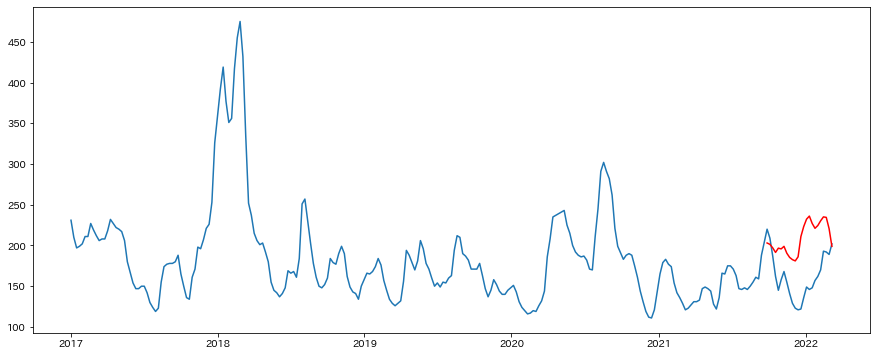

In [16]:
bestPred = result.predict('2021-09-27', '2022-03-07',freq="W-MON")
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

3048.940705778261

ARMA

In [18]:
sm.tsa.arma_order_select_ic(y, ic='aic')

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'aic':              0            1            2
 0  2726.791199  2432.185040  2443.689262
 1  2134.952348  2040.775498  2019.734097
 2  2022.560430  2018.140397  2017.835489
 3  2016.080330  2017.054551  2018.037257
 4  2016.504330  2018.767768  2019.549591,
 'aic_min_order': (3, 0)}

In [19]:
arma_model = sm.tsa.ARMA(y, order=(3,0),freq="W-MON").fit()
arma_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06095D+00    |proj g|=  1.19496D-03

At iterate    5    f=  4.06094D+00    |proj g|=  4.46754D-05

At iterate   10    f=  4.06094D+00    |proj g|=  1.24381D-03

At iterate   15    f=  4.06089D+00    |proj g|=  1.10933D-04

At iterate   20    f=  4.06089D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   8.882D-08   4.061D+00
  F =   4.0608913556574739     

CONVERG

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   キャベツ   No. Observations:                  247
Model:                     ARMA(3, 0)   Log Likelihood               -1003.040
Method:                       css-mle   S.D. of innovations             13.943
Date:                Mon, 28 Mar 2022   AIC                           2016.080
Time:                        10:12:24   BIC                           2033.627
Sample:                    01-02-2017   HQIC                          2023.145
                         - 09-20-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        186.4899     14.254     13.083      0.000     158.552     214.428
ar.L1.キャベツ     1.6474      0.062     26.393      0.000       1.525       1.770
ar.L2.キャベツ    -0.8923      0.108     -8.242      0.000      -1.104      -0.680
ar.L3.キャベツ     0.1842      0.063      2.939      0.003       0.061       0.307
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1666           -0.0000j            1.1666           -0.0000
AR.2            1.8387           -1.1282j            2.1572           -0.0876
AR.3            1.8387           +1.1282j            2.1572            0.0876
-----------------------------------------------------------------------------
"""

In [20]:
arma_model.predict('2021-09-27', '2022-03-07')

2021-09-27    208.925073
2021-10-04    208.104463
2021-10-11    205.305397
2021-10-18    202.333593
2021-10-25    199.784142
2021-11-01    197.720170
2021-11-08    196.047315
2021-11-15    194.663417
2021-11-22    193.495999
2021-11-29    192.499431
2021-12-06    191.644397
2021-12-13    190.909959
2021-12-20    190.279379
2021-12-27    189.738363
2022-01-03    189.274444
2022-01-10    188.876749
2022-01-17    188.535863
2022-01-24    188.243673
2022-01-31    187.993220
2022-02-07    187.778538
2022-02-14    187.594514
2022-02-21    187.436769
2022-02-28    187.301551
2022-03-07    187.185642
Freq: W-MON, dtype: float64

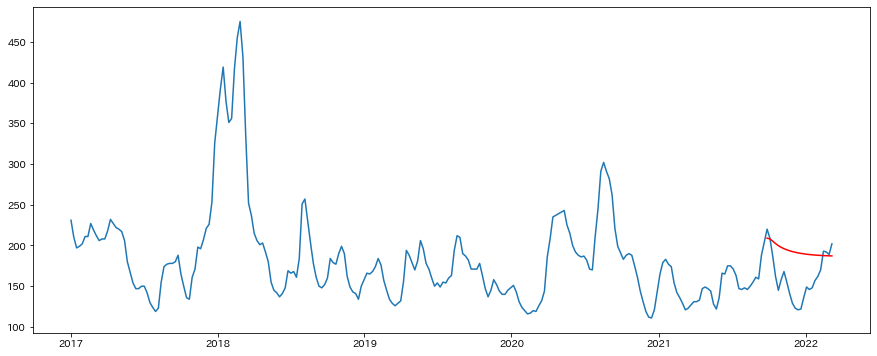

In [21]:
bestPred = arma_model.predict('2021-09-27', '2022-03-07')
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

1679.3920532139607

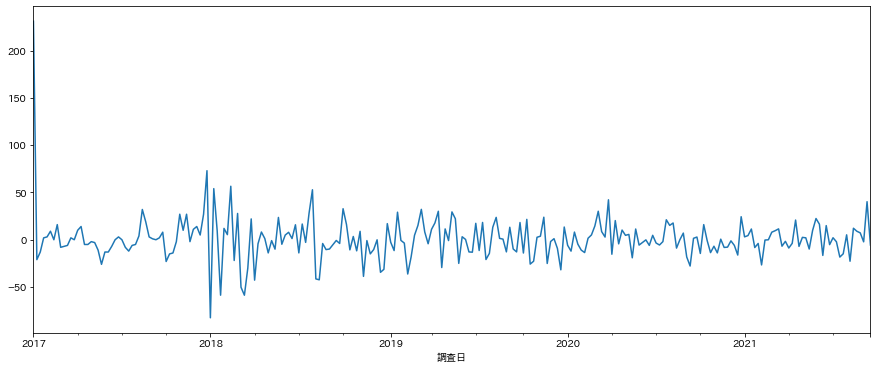

In [23]:
result.resid.plot()